In [0]:
import tensorflow as tf
import keras
from keras.datasets import cifar10                                                       #The Dataset is directly imported 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import MaxPooling2D,Convolution2D
from keras.optimizers import Adam
import numpy as np
from keras.utils import np_utils

In [0]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()      #The Dataset is directly loaded

In [35]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples') #No. of Trained samples
print(x_test.shape[0], 'test samples')   #No. of Test samples

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255                            #Input features are scaled between 0 and 1
x_test/=255

In [0]:
nClasses=10                                                 #No. of classes in the CIFAR10 dataset 
y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)

In [0]:
model=Sequential()
model.add(Convolution2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Convolution2D(32,(3,3),padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(64,(3,3),padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Convolution2D(64,(3,3),padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Convolution2D(128,(3,3),padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Convolution2D(128,(3,3),padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))


In [41]:
# model.compile(optimizer= 'adam',
#              loss='categorical_crossentropy',
#           metrics=['accuracy'])
# model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test)) 
from keras.optimizers import adam
AdamOpt = adam(lr=0.001) 
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', 
metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 60s 1ms/step - loss: 1.4305 - acc: 0.5319 - val_loss: 1.0131 - val_acc: 0.6610
Epoch 2/20
50000/50000 [==============================] - 55s 1ms/step - loss: 0.9369 - acc: 0.6776 - val_loss: 0.7721 - val_acc: 0.7309
Epoch 3/20
50000/50000 [==============================] - 56s 1ms/step - loss: 0.7789 - acc: 0.7309 - val_loss: 0.6987 - val_acc: 0.7574
Epoch 4/20
50000/50000 [==============================] - 55s 1ms/step - loss: 0.6808 - acc: 0.7628 - val_loss: 0.6324 - val_acc: 0.7804
Epoch 5/20
50000/50000 [==============================] - 56s 1ms/step - loss: 0.6083 - acc: 0.7861 - val_loss: 0.6210 - val_acc: 0.7827
Epoch 6/20
50000/50000 [==============================] - 56s 1ms/step - loss: 0.5549 - acc: 0.8069 - val_loss: 0.6534 - val_acc: 0.7791
Epoch 7/20
50000/50000 [==============================] - 56s 1ms/step - loss: 0.5110 - acc: 0.8206 - val_loss: 0.5497 - val_acc

In [42]:
model.evaluate(x_test,y_test)


10000/10000 [==============================] - 3s 290us/step


[0.4821234549999237, 0.8473]

In [0]:
predictions=model.predict([x_test])

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
print(np.argmax(predictions[999]))

8


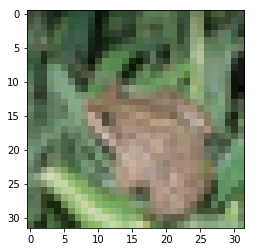

In [27]:
plt.imshow(x_test[4])
plt.show()

In [45]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [50]:
model_json = model.to_json()
with open("/gdrive/My Drive/weights/cifar.json", "w") as json_file:
   json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/gdrive/My Drive/weights/model.h5")
print("Saved model to disk")


Saved model to disk


In [59]:
from keras.models import model_from_json

json_file = open('/gdrive/My Drive/weights/cifar.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# load weights into new model
model.load_weights("/gdrive/My Drive/weights/model.h5")
print("Loaded model from disk")

Loaded model from disk
